In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import datetime
import numpy as np
from PIL import Image
import os

### Functions

In [2]:
def get_frames(path,_from,_to,_all=False):
    """
    --> renvoie toutes les frames 
    _from : borne inferieur en secondes
    _to : borne superieur en secondes
    _all : renvoie toutes les frames de la video
    """
    
    frames = []
    
    # lire la video et recuperer les stats
    video = cv.VideoCapture(path)
    frames_tot = int(video.get(cv.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv.CAP_PROP_FPS)
    seconds = round(frames_tot / fps)

    # lever une exception si parametres invalides
    if _to > seconds:
        raise Exception("Nombre de seconds invalide")
        
    
    if _all:
        nb_frames = frames_tot
    else:
        video.set(cv.CAP_PROP_POS_MSEC, _from * 1000)
        nb_frames = int((_to - _from) * fps)

    for i in range(0,nb_frames):
        _,frame = video.read()
        if i % int(fps*10) == 0:
            frames.append(frame)
        
    return np.array(frames)

def saving(frames,path_direc):
    """
    --> enregistre les frames dans le repertoire
    frames : liste de frames
    path_direc : le nom du repertoire 
    """
    
    if not os.path.exists(path_direc):
        os.mkdir(path_direc)
    
    for i_frame in range(frames.shape[0]):
        frame = Image.fromarray(frames[i_frame])
        name = "FRAME"+str(i_frame)+".png"
        frame.save(path_direc+"/"+name)
        
def frame_partionned(frame,x,y,height,width):
    """
    --> renvoie la nouvelle frame partionnée
    frame : image à decouper
    x : position de depart
    y : position de depart
    height : longueur de decoupage
    width : largeur de decoupage
    """
    sh0,sh1 = frame.shape[0],frame.shape[1]
    if x+width > sh0 or x > sh0:
        raise Exception("Coordonnées de decoupage invalides : image de taille",(sh0,sh1))
    if y+height > sh1 or y > sh1:
        raise Exception("Coordonnées de decoupage invalides : image de taille",(sh0,sh1))
    
    return frame[x:x+width , y:y+height]

def generate_dataset(frames,coord,rep,path):
    """
    --> renvoie le set d'images correspond et les enregistre dans le path 
    coord_train : positon_depart_x,positon_depart_x,longueur,largeur --> pour le train
    coord_test : positon_depart_x,positon_depart_x,longueur,largeur --> pour le test
    """
    x,y,hei,wid = coord
    images = []
    for i_frame in range(frames.shape[0]):
        
        frame_parti = frame_partionned(frames[i_frame],x,y,hei,wid)
        images.append(frame_parti)
        frame_parti = Image.fromarray(frame_parti)
        name = "frame"+str(i_frame)+".png"

        os.chdir(rep+"/"+path)
        frame_parti.save(name)
        
    return images

### Tests

In [3]:
path = "VIDEOS/video_juste_nid-test.mp4"
video = cv.VideoCapture(path)
  

nb_frames = int(video.get(cv.CAP_PROP_FRAME_COUNT))
fps = video.get(cv.CAP_PROP_FPS)
  
seconds = round(nb_frames / fps)
video_time = datetime.timedelta(seconds=seconds)
print(f"nombre de frames : {nb_frames}")
print(f"durée en seconds : {seconds}")
print(f"temps de la video: {video_time}")
print()

# recuperer les frames entre 0s et 10s
frames = get_frames(path,0,120)
print(f"nombre de frames recuperées: {frames.shape[0]}")

# saving(frames,'./saving_frames')

nombre de frames : 14700
durée en seconds : 588
temps de la video: 0:09:48

nombre de frames recuperées: 12


In [4]:
frames = get_frames("VIDEOS/video_juste_nid-test.mp4",0,120)

source = os.getcwd()
path = "images/train"
coord_train = [0,0,550,1000]
# generer les images pour le train
train_images = generate_dataset(frames,coord_train,source,path)

path = "images/test"
coord_test = [0,500,900,1000]
# generer les images pour le test
test_images = generate_dataset(frames,coord_test,source,path)

### Lecture des images

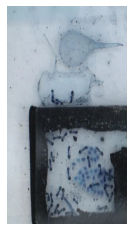

In [5]:
plt.imshow(train_images[0])
plt.axis('off')
plt.show()

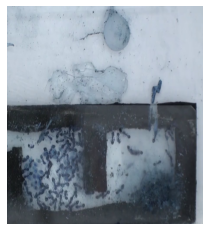

In [6]:
plt.imshow(test_images[0])
plt.axis('off')
plt.show()